Example notebook to have a look at the results of the 'uvva_pipe -cfg uvva_pipe_example_cfg.yaml' results.
The output of the pipline was stored in the folder uvva_pipe_example.

In [1]:
%matplotlib widget
# General seup and library loading
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
import healpy as hpy

from uvva.region import Region
from uvva.field import BaseField, GALEXField

results_folder = "./uvva_pipe_example/"

In [2]:
# Show basic region information
region_fname = results_folder+"region_uvva_pipe_example.fits"
rg = Region()
rg.load_from_fits(region_fname)
rg.tt_fields.show_in_notebook()

idx,field_id,name,ra,dec,observatory,obs_filter,fov_diam,nr_vis,time_bin_size_sum,time_start,time_stop,sel
,,,deg,deg,,,deg,,s,d,d,
0,2604912508670050304,PS_COSMOS_MOS21,150.50213748204703,3.09702777491166,GALEX,NUV,0.55,29,28075.799999999996,54510.593935185185,56535.16921296297,True
1,2604982877414227968,PS_COSMOS_MOS22,149.49989874061703,3.10005767451708,GALEX,NUV,0.55,29,27164.39999999999,54509.566979166666,56515.80884259259,True


In [3]:
#Show visits info
rg.tt_visits[0:4].show_in_notebook()

idx,vis_id,time_bin_start,time_bin_size,time_bin_size_alt_filt,ra,dec,sel,field_id
,,d,s,s,deg,deg,,
0,2604912371054936064,54510.593935185185,1275.65,1275.65,150.51340748379,3.0843527367265,True,2604912508670050304
1,2604912371088490496,54520.659050925926,1166.65,1166.65,150.506664401892,3.09277021694114,True,2604912508670050304
2,2604912371122044928,54524.42622685185,1065.6,1065.6,150.487835852699,3.09679069462553,True,2604912508670050304
3,2604912371155599360,54532.507210648146,1221.6,1221.6,150.497124625876,3.10058774374463,True,2604912508670050304


In [4]:
# Show some selected sources
sel = rg.tt_sources["sel"]
rg.tt_sources[sel][0:4].show_in_notebook()

idx,src_id,ra,dec,nr_det,nr_uls,mag_mean,mag_var,mag_rchiq,mag_dmax,mag_dmax_sig,ul_weight,sel,field_id
,,deg,deg,,,,,,,,,,
0,13,150.5052288307789,3.376008159991874,27,2,19.108290707623517,0.0017808899615867485,3.218736938123674,0.11990066810890454,4.312380877406151,0.0,True,2604912508670050304
1,19,150.85211129228375,3.344284140463829,26,3,20.082601987398586,0.0035474839293175475,1.948684796827247,0.1702980628380395,5.214141079370534,0.0,True,2604912508670050304
2,21,150.74963602322276,3.452460414772258,26,3,19.53726130265456,0.0018528061574544102,2.1387202543032577,0.09524279374342726,3.121809498596808,0.0,True,2604912508670050304
3,33,150.1563309812132,3.1314012585076463,26,3,19.60211343031663,0.001964534167394065,2.0469830731000815,0.09667998093825148,2.918407744029772,0.0,True,2604912508670050304


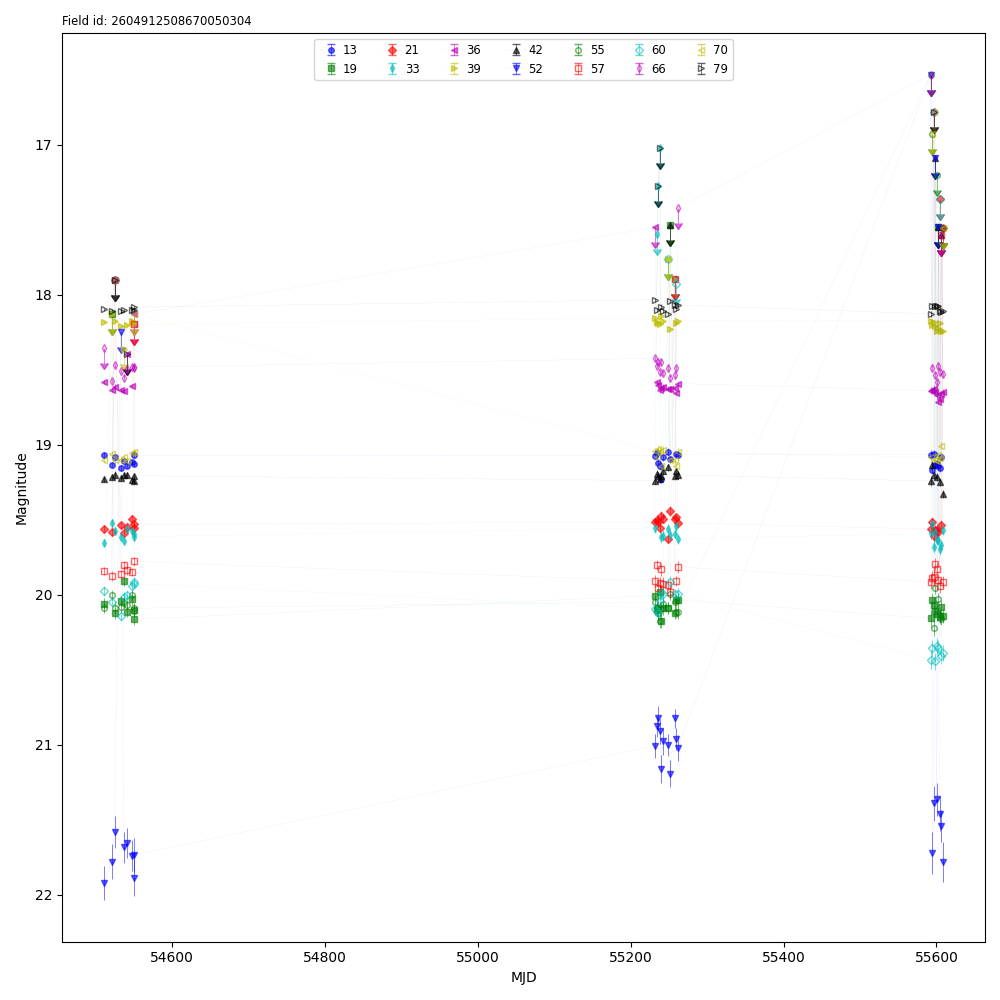

In [5]:
#Plot light curves for some selected sources
src_ids = rg.tt_sources[sel]["src_id"][0:14]
field_ids = rg.tt_sources[sel]["field_id"][0:14]
lcs = rg.get_light_curve(src_ids, field_ids)
fig_lc = plt.figure(figsize=(10, 10))
rg.plot_light_curve(src_ids, field_ids)
plt.tight_layout()
plt.show()

In [6]:
#Get and show first lightcurve in BinnedTimeSeries format
lc_01 = rg.get_light_curve(src_ids[0], field_ids[0])
lc_01.show_in_notebook()

idx,time_start,time_delta,mag,mag_err,ul
,d,s,,,
0,54510.593935185185,1275.65,19.067777633666992,0.017989851534366608,18.353994369506836
1,54520.659050925926,1166.65,19.132465362548828,0.019917603582143784,18.130695343017578
2,54524.42622685185,1065.6,19.083269119262695,0.019509101286530495,17.904199600219727
3,54532.507210648146,1221.6,19.156545639038086,0.01874620094895363,18.245758056640625
4,54536.27280092592,1280.6,19.106746673583984,0.01894262246787548,18.363676071166992
5,54540.311423611114,1296.6,19.140544891357422,0.018185952678322792,18.394718170166016
6,54547.56912037037,1233.55,19.118648529052734,0.018318384885787964,18.27009391784668
7,54549.897627314815,1198.6,19.12703514099121,0.018537189811468124,18.198240280151367
8,54550.171585648146,1166.6,19.069965362548828,0.017728228121995926,18.13058853149414


In [7]:
# Display the lightcurve info for some more selected sources
rg.ta_sources_lc[sel][0:2].show_in_notebook()

idx,src_id,mag,mag_err,ul,field_id
,,,,,
0,13,[19.067778 19.132465 19.08327 19.156546 19.106747 19.140545 19.118649 19.127035 19.069965 19.072947 19.05392 19.120884 19.143364 19.228191 19.084702 19.047863 19.098072 -1. 19.06332 19.066944 19.067003 19.166466 19.064579 19.135601 19.126026 19.141756 19.15484 19.084372 -1. ],[ 0.01798985 0.0199176 0.0195091 0.0187462 0.01894262 0.01818595 0.01831838 0.01853719 0.01772823 0.02268284 0.0230739 0.02698857 0.02817462 0.02780382 0.0257752 0.02270276 0.02489625 -1. 0.01962205 0.02585255 0.03060135 0.02873802 0.0275191 0.0262007 0.02602438 0.02376893 0.02590873 0.02210563 -1. ],[18.353994 18.130695 17.9042 18.245758 18.363676 18.394718 18.270094 18.19824 18.130589 17.551802 17.597439 17.278326 17.02131 17.057617 17.116014 17.761925 17.53826 17.89244 17.931963 17.42435 16.532663 16.926003 16.781382 17.087067 17.201674 17.549099 17.361164 17.602737 17.554636],2604912508670050304
1,19,[20.05955 -1. 20.125635 20.04069 19.912304 20.112907 20.03194 20.102726 20.16471 20.006193 20.099844 20.089745 19.9853 20.17396 20.087082 20.087645 -1. 20.122078 20.03694 20.035116 20.157976 20.038393 20.066216 20.109518 20.127005 -1. 20.147915 20.083242 20.143024],[ 0.03701537 -1. 0.03700185 0.03399533 0.03266081 0.03391747 0.0368081 0.03723254 0.03564352 0.0378229 0.04098009 0.04666338 0.0472771 0.04725816 0.04782284 0.04051124 -1. 0.0377781 0.03884385 0.04371269 0.05705436 0.04593648 0.05014113 0.04492408 0.04856652 -1. 0.04705551 0.04682399 0.04487884],[18.353994 18.130695 17.9042 18.245758 18.363676 18.394718 18.270094 18.19824 18.130589 17.551802 17.597439 17.278326 17.02131 17.057617 17.116014 17.761925 17.53826 17.89244 17.931963 17.42435 16.532663 16.926003 16.781382 17.087067 17.201674 17.549099 17.361164 17.602737 17.554636],2604912508670050304


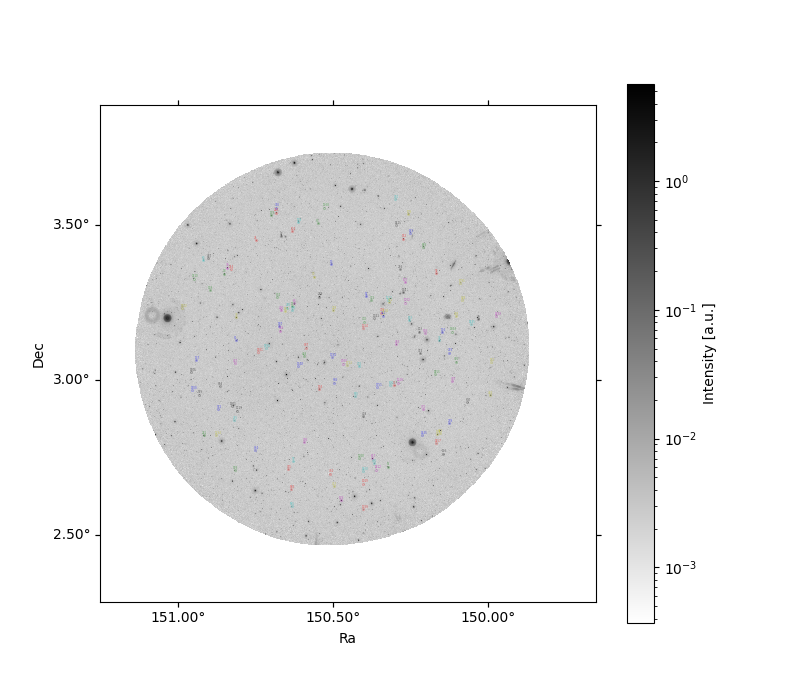

In [8]:
# Look at ta specific field
field_fname = results_folder+"fields/2604912508670050304/field_2604912508670050304.fits"
fd = BaseField()
fd.load_from_fits(field_fname)
fig_sky = fd.plot_sky(plot_detections=True)

In [9]:
#Get coverage hp map
nside = rg.tt_coverage_hp.meta["NSIDE"]
npix = hpy.nside2npix(nside)
rg.tt_coverage_hp[0:10].show_in_notebook()

idx,pix_id,nr_vis,exp
0,94747282,29,27164.4
1,94747283,29,27164.4
2,94747284,29,27164.4
3,94747285,29,27164.4
4,94747286,29,27164.4
5,94747328,29,28075.8
6,94747329,29,28075.8
7,94747330,29,28075.8
8,94747331,29,28075.8
9,94763664,29,27164.4


86.48655425487536 93.51344574512464 -3.513445745124643 3.513445745124643


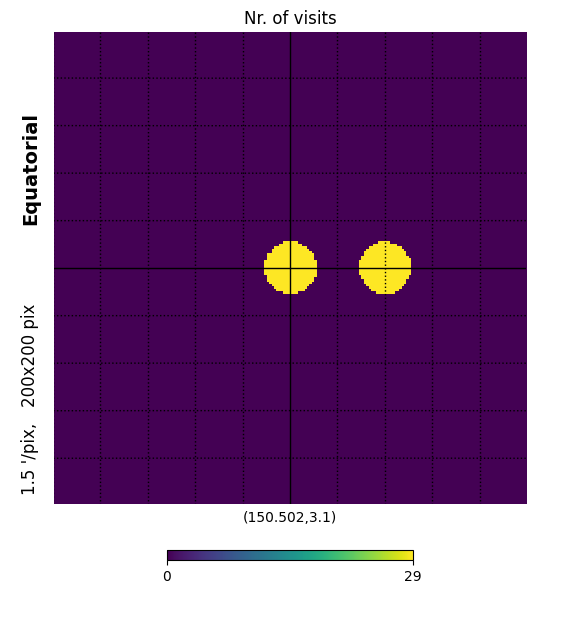

In [10]:
#Plot Nr visits or exposure
hp_map = np.zeros(npix,dtype=np.float64)
pix_ids = rg.tt_coverage_hp["pix_id"].data.astype(np.int64)
hp_map[pix_ids] = rg.tt_coverage_hp["nr_vis"]
hpy.gnomview(hp_map,rot=[rg.tt_fields[0]["ra"],rg.tt_fields[1]["dec"]],title="Nr. of visits",coord="C")
hpy.graticule(local=True,coord="C",dpar=0.5) # show graticules every 0.5 deg